In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("C:\\Users\\Shruti Udagire\\Supervised_Categorical\\Files\\telco_chrun_encoded.csv")


In [3]:
df.head(2)

,gender,senior,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,total_charges,churn,avg_monthly_charges,internet_service-fiber_optic,internet_service-no,contract-one_year,contract-two_year,payment_method-credit_card_auto,payment_method-electronic_check,payment_method-mailed_check
0,1,0,1,0,1,0,0,0,1,0,...,29.85,0,29.850000,0,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1889.50,0,55.573529,0,0,1,0,0,0,1


In [4]:
df.columns

Index(['gender', 'senior', 'partner', 'dependents', 'tenure', 'phone_service',
       'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges', 'churn',
       'avg_monthly_charges', 'internet_service-fiber_optic',
       'internet_service-no', 'contract-one_year', 'contract-two_year',
       'payment_method-credit_card_auto', 'payment_method-electronic_check',
       'payment_method-mailed_check'],
      dtype='object')

In [5]:
df['churn'].value_counts()

0    5163
1    1869
Name: churn, dtype: int64

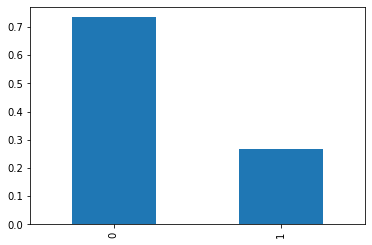

In [6]:

df['churn'].value_counts(normalize=True).plot(kind='bar')

In [7]:
df.isnull().sum()

gender                             0
senior                             0
partner                            0
dependents                         0
tenure                             0
phone_service                      0
multiple_lines                     0
online_security                    0
online_backup                      0
device_protection                  0
tech_support                       0
streaming_tv                       0
streaming_movies                   0
paperless_billing                  0
monthly_charges                    0
total_charges                      0
churn                              0
avg_monthly_charges                0
internet_service-fiber_optic       0
internet_service-no                0
contract-one_year                  0
contract-two_year                  0
payment_method-credit_card_auto    0
payment_method-electronic_check    0
payment_method-mailed_check        0
dtype: int64

In [8]:
df=df.sample(frac=1,random_state=3)
y=df['churn']
X=df.drop('churn',axis=1)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

In [10]:
#ADABOOST Classifier

In [11]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(random_state=3)
ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=3)

Overall Accuracy -Train 0.8108492482730597
Confusion matrix-Train 
 [[3235  356]
 [ 575  756]]
AUC - Train 0.8626860790845132
-------------------------------------------------------------------------
Overall Accuracy -Test 0.8080568720379147
Confusion matrix-Test 
 [[1412  160]
 [ 245  293]]
AUC - Test 0.8384466311000124


Text(0, 0.5, 'TPR')

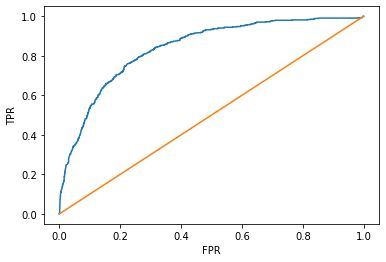

In [12]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve
y_train_predict=ada.predict(X_train)
y_train_prob=ada.predict_proba(X_train)[:,-1]
y_train_predict
print('Overall Accuracy -Train',accuracy_score(y_train,y_train_predict))
print('Confusion matrix-Train','\n',confusion_matrix(y_train,y_train_predict))
print('AUC - Train',roc_auc_score(y_train,y_train_prob))
print("-------------------------------------------------------------------------")

y_test_pred=ada.predict(X_test)
y_test_prob=ada.predict_proba(X_test)[:,-1]
print('Overall Accuracy -Test',accuracy_score(y_test,y_test_pred))
print('Confusion matrix-Test','\n',confusion_matrix(y_test,y_test_pred))
print('AUC - Test',roc_auc_score(y_test,y_test_prob))

fpr,tpr,thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [ ]:
#lightgbm classifier

In [20]:
import lightgbm as lgb
lgbm=lgb.LGBMClassifier()

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

params={"n_estimators":sp_randint(50,200),
        'max_depth':sp_randint(2,15),
        'learning_rate':sp_uniform(0.001,0.05),
        "num_leaves":sp_randint(20,50)
}
rsearch=RandomizedSearchCV(lgbm,param_distributions=params,cv=3,n_iter=200,n_jobs=-1,random_state=3)
rsearch.fit(X,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg_lambda=0.0, sile...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026D78226C4

In [26]:
rsearch.best_params_

{'learning_rate': 0.03355613852207997,
 'max_depth': 6,
 'n_estimators': 113,
 'num_leaves': 29}

In [30]:
lgbm=lgb.LGBMClassifier(**rsearch.best_params_)
lgbm.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.03355613852207997,
               max_depth=6, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=113, n_jobs=-1, num_leaves=29,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [31]:
y_train_predict=lgbm.predict(X_train)
y_train_prob=lgbm.predict_proba(X_train)[:,-1]
y_train_predict
print('Overall Accuracy -Train',accuracy_score(y_train,y_train_predict))
print('Confusion matrix-Train','\n',confusion_matrix(y_train,y_train_predict))
print('AUC - Train',roc_auc_score(y_train,y_train_prob))

Overall Accuracy -Train 0.8350264120276311
Confusion matrix-Train 
 [[3304  287]
 [ 525  806]]
AUC - Train 0.9001613307833404


In [33]:
y_test_pred=lgbm.predict(X_test)
y_test_prob=lgbm.predict_proba(X_test)[:,-1]
print('Overall Accuracy -Test',accuracy_score(y_test,y_test_pred))
print('Confusion matrix-Test','\n',confusion_matrix(y_test,y_test_pred))
print('AUC - Test',roc_auc_score(y_test,y_test_prob))

Overall Accuracy -Test 0.809478672985782
Confusion matrix-Test 
 [[1422  150]
 [ 252  286]]
AUC - Test 0.8452318453985639


Text(0, 0.5, 'TPR')

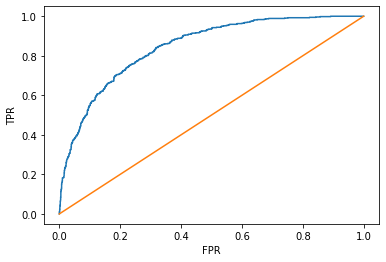

In [34]:
fpr,tpr,thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel('FPR')
plt.ylabel('TPR')